# Student Performance & Learning Style

## 1. Understanding the Problem

## 2. Data Understanding

**Link**: https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style

## 3. Data exploration

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import col, isnan, when, count, avg, min, max, round, sum, mode, median
import os

### 3.1. Review the state of the data

In [2]:
# Create spark session
spark = SparkSession.builder.appName("StudentPerformanceLearningStyle").getOrCreate()

In [3]:
# File location and type
# file_location = "/FileStore/tables/student_performance_large_dataset"
file_location = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "Student_Performance_Learning_Style", "student_performance_large_dataset.csv")

# Define schema
data_schema = StructType([
    StructField("Student_ID", StringType(), True),
    StructField("Age", IntegerType(), True),
    StructField("Gender", StringType(), True),
    StructField("Study_Hours_per_Week", IntegerType(), True),
    StructField("Preferred_Learning_Style", StringType(), True),
    StructField("Online_Courses_Completed", IntegerType(), True),
    StructField("Participation_in_Discussions", StringType(), True),
    StructField("Assignment_Completion_Rate", IntegerType(), True),
    StructField("Exam_Score", IntegerType(), True),
    StructField("Attendance_Rate", IntegerType(), True),
    StructField("Use_of_Educational_Tech", StringType(), True),
    StructField("Self_Reported_Stress_Level", StringType(), True),
    StructField("Time_Spent_on_Social_Media", IntegerType(), True),
    StructField("Sleep_Hours_per_Night", IntegerType(), True),
    StructField("Final_Grade", StringType(), True),
])

# Read CSV file
df = spark.read.option("delimiter", ",") \
                .option("header", True) \
                .option("inferSchema", False) \
                .schema(data_schema) \
                .csv(file_location)

In [4]:
df.limit(5).show()

+----------+---+------+--------------------+------------------------+------------------------+----------------------------+--------------------------+----------+---------------+-----------------------+--------------------------+--------------------------+---------------------+-----------+
|Student_ID|Age|Gender|Study_Hours_per_Week|Preferred_Learning_Style|Online_Courses_Completed|Participation_in_Discussions|Assignment_Completion_Rate|Exam_Score|Attendance_Rate|Use_of_Educational_Tech|Self_Reported_Stress_Level|Time_Spent_on_Social_Media|Sleep_Hours_per_Night|Final_Grade|
+----------+---+------+--------------------+------------------------+------------------------+----------------------------+--------------------------+----------+---------------+-----------------------+--------------------------+--------------------------+---------------------+-----------+
|    S00001| 18|Female|                  48|             Kinesthetic|                      14|                         Yes|       

In [5]:
df.show(1, vertical = True)

-RECORD 0-----------------------------------
 Student_ID                   | S00001      
 Age                          | 18          
 Gender                       | Female      
 Study_Hours_per_Week         | 48          
 Preferred_Learning_Style     | Kinesthetic 
 Online_Courses_Completed     | 14          
 Participation_in_Discussions | Yes         
 Assignment_Completion_Rate   | 100         
 Exam_Score                   | 69          
 Attendance_Rate              | 66          
 Use_of_Educational_Tech      | Yes         
 Self_Reported_Stress_Level   | High        
 Time_Spent_on_Social_Media   | 9           
 Sleep_Hours_per_Night        | 8           
 Final_Grade                  | C           
only showing top 1 row



In [6]:
df.printSchema()

root
 |-- Student_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Study_Hours_per_Week: integer (nullable = true)
 |-- Preferred_Learning_Style: string (nullable = true)
 |-- Online_Courses_Completed: integer (nullable = true)
 |-- Participation_in_Discussions: string (nullable = true)
 |-- Assignment_Completion_Rate: integer (nullable = true)
 |-- Exam_Score: integer (nullable = true)
 |-- Attendance_Rate: integer (nullable = true)
 |-- Use_of_Educational_Tech: string (nullable = true)
 |-- Self_Reported_Stress_Level: string (nullable = true)
 |-- Time_Spent_on_Social_Media: integer (nullable = true)
 |-- Sleep_Hours_per_Night: integer (nullable = true)
 |-- Final_Grade: string (nullable = true)



In [7]:
# Describe numeric features
df.select("Age", "Study_Hours_per_Week", "Online_Courses_Completed", "Assignment_Completion_Rate", "Exam_Score", "Attendance_Rate",
          "Time_Spent_on_Social_Media", "Sleep_Hours_per_Night").describe().show()

+-------+-----------------+--------------------+------------------------+--------------------------+-----------------+-----------------+--------------------------+---------------------+
|summary|              Age|Study_Hours_per_Week|Online_Courses_Completed|Assignment_Completion_Rate|       Exam_Score|  Attendance_Rate|Time_Spent_on_Social_Media|Sleep_Hours_per_Night|
+-------+-----------------+--------------------+------------------------+--------------------------+-----------------+-----------------+--------------------------+---------------------+
|  count|            10000|               10000|                   10000|                     10000|            10000|            10000|                     10000|                10000|
|   mean|          23.4788|             27.1303|                 10.0079|                    74.922|          70.1889|          75.0851|                   14.9365|               6.9793|
| stddev|3.461986293287354|  13.002547001755211|       6.1367257988566

In [8]:
# Describe categorical features
df.select("Student_ID", "Gender", "Preferred_Learning_Style", "Participation_in_Discussions", "Use_of_Educational_Tech", "Self_Reported_Stress_Level", 
          "Final_Grade").describe().show()

+-------+----------+------+------------------------+----------------------------+-----------------------+--------------------------+-----------+
|summary|Student_ID|Gender|Preferred_Learning_Style|Participation_in_Discussions|Use_of_Educational_Tech|Self_Reported_Stress_Level|Final_Grade|
+-------+----------+------+------------------------+----------------------------+-----------------------+--------------------------+-----------+
|  count|     10000| 10000|                   10000|                       10000|                  10000|                     10000|      10000|
|   mean|      NULL|  NULL|                    NULL|                        NULL|                   NULL|                      NULL|       NULL|
| stddev|      NULL|  NULL|                    NULL|                        NULL|                   NULL|                      NULL|       NULL|
|    min|    S00001|Female|                Auditory|                          No|                     No|                      Hig

In [9]:
# Identify missing values
missing_values = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show(1, vertical = True)

-RECORD 0---------------------------
 Student_ID                   | 0   
 Age                          | 0   
 Gender                       | 0   
 Study_Hours_per_Week         | 0   
 Preferred_Learning_Style     | 0   
 Online_Courses_Completed     | 0   
 Participation_in_Discussions | 0   
 Assignment_Completion_Rate   | 0   
 Exam_Score                   | 0   
 Attendance_Rate              | 0   
 Use_of_Educational_Tech      | 0   
 Self_Reported_Stress_Level   | 0   
 Time_Spent_on_Social_Media   | 0   
 Sleep_Hours_per_Night        | 0   
 Final_Grade                  | 0   



### 3.2. EDA

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
plt.style.use("ggplot")

#### 3.2.1. Target variable

In [12]:
target_variable = "Final_Grade"

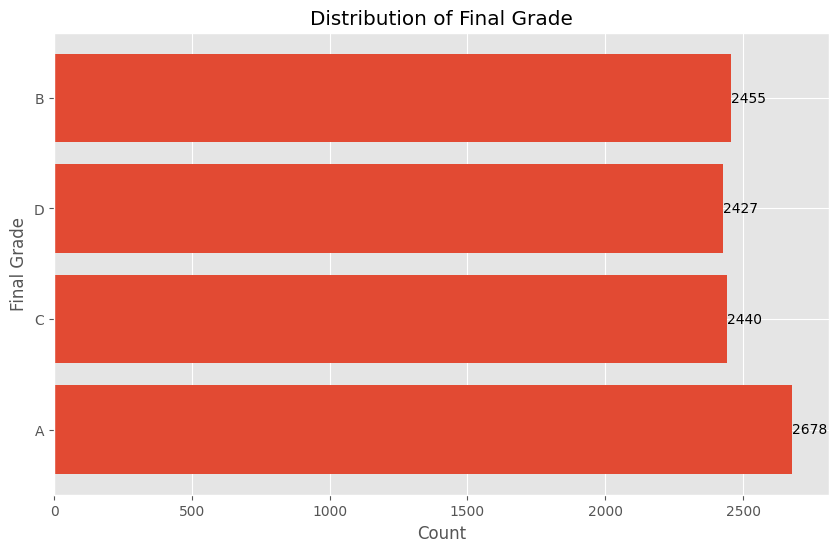

In [13]:
df_group = df.groupby(target_variable).count()
df_group_pandas = df_group.toPandas()

plt.figure(figsize = (10, 6))
bars = plt.barh(df_group_pandas[target_variable], df_group_pandas["count"])
for b in bars:
    plt.text(b.get_width(), b.get_y() + b.get_height()/2, f"{b.get_width()}", va = "center")
plt.xlabel("Count")
plt.ylabel("Final Grade")
plt.title("Distribution of Final Grade")
plt.gca().invert_yaxis()
plt.show()

Final Grade vs Age

In [14]:
df.groupby("Final_Grade").agg(round(avg("Age"), 2).alias("Average_Age"), 
                              min("Age").alias("Minimum_Age"), 
                              max("Age").alias("Maximum_Age"),
                              median("Age").alias("Median_Age"),
                              mode("Age").alias("Mode_Age")).orderBy("Final_Grade").show()

+-----------+-----------+-----------+-----------+----------+--------+
|Final_Grade|Average_Age|Minimum_Age|Maximum_Age|Median_Age|Mode_Age|
+-----------+-----------+-----------+-----------+----------+--------+
|          A|      23.48|         18|         29|      23.0|      20|
|          B|      23.51|         18|         29|      24.0|      18|
|          C|      23.45|         18|         29|      23.0|      27|
|          D|      23.48|         18|         29|      23.0|      19|
+-----------+-----------+-----------+-----------+----------+--------+



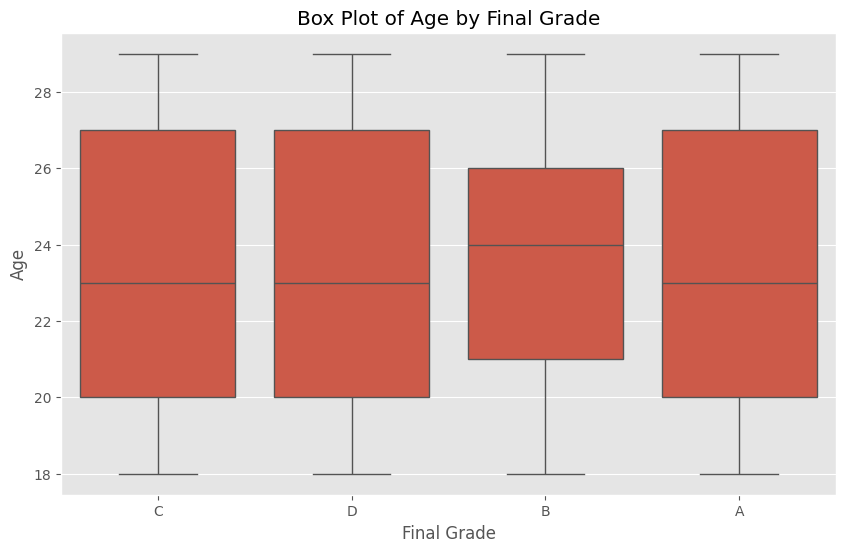

In [25]:
df_pandas = df.select("Final_Grade", "Age").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Age", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Age")
plt.title("Box Plot of Age by Final Grade")
plt.show()

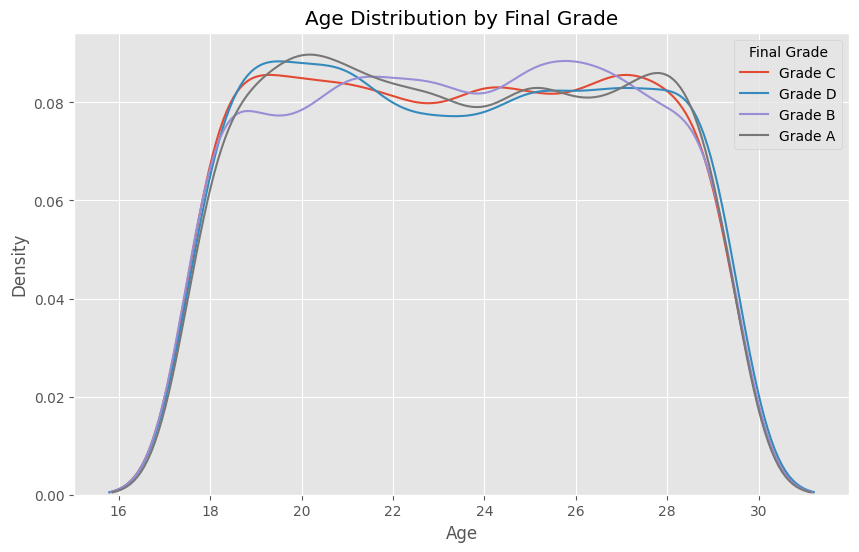

In [23]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Age"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution by Final Grade")
plt.legend(title = "Final Grade")
plt.show()

Final grade vs Gender

In [17]:
df_count_1 = df.groupby("Final_Grade", "Gender").count().withColumnRenamed("count", "Count").orderBy("Final_Grade", "Gender")
df_count_2 = df.groupby("Final_Grade").count().withColumnRenamed("count", "Count_Grade").orderBy("Final_Grade")

df_count_1.join(df_count_2, on = "Final_Grade", how = "inner") \
                .withColumn("Percentage", round((col("Count") / col("Count_Grade")) * 100, 2)) \
                .orderBy("Final_Grade", "Gender") \
                .select("Final_Grade", "Gender", "Count", "Percentage").show()

+-----------+------+-----+----------+
|Final_Grade|Gender|Count|Percentage|
+-----------+------+-----+----------+
|          A|Female| 1302|     48.62|
|          A|  Male| 1262|     47.12|
|          A| Other|  114|      4.26|
|          B|Female| 1197|     48.76|
|          B|  Male| 1168|     47.58|
|          B| Other|   90|      3.67|
|          C|Female| 1161|     47.58|
|          C|  Male| 1168|     47.87|
|          C| Other|  111|      4.55|
|          D|Female| 1186|     48.87|
|          D|  Male| 1150|     47.38|
|          D| Other|   91|      3.75|
+-----------+------+-----+----------+



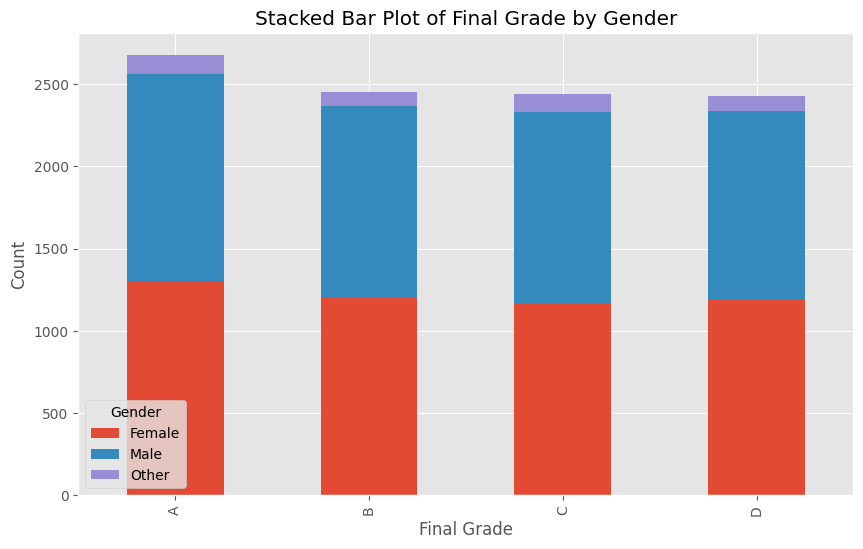

In [33]:
df_pandas = df.select("Final_Grade", "Gender").toPandas()
crosstab = pd.crosstab(df_pandas["Final_Grade"], df_pandas["Gender"])

crosstab.plot(kind = "bar", stacked = True, figsize = (10, 6))
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Final Grade by Gender")
plt.show()

Final Grade vs Study Hours per Week

In [35]:
df.groupby("Final_Grade").agg(round(avg("Study_Hours_per_Week"), 2).alias("Average_Study_Hours_per_Week"), 
                                    min("Study_Hours_per_Week").alias("Minimum_Study_Hours_per_Week"), 
                                    max("Study_Hours_per_Week").alias("Maximum_Study_Hours_per_Week"),
                                    median("Study_Hours_per_Week").alias("Median_Study_Hours_per_Week"),
                                    mode("Study_Hours_per_Week").alias("Mode_Study_Hours_per_Week")).orderBy("Final_Grade").show()

+-----------+----------------------------+----------------------------+----------------------------+---------------------------+-------------------------+
|Final_Grade|Average_Study_Hours_per_Week|Minimum_Study_Hours_per_Week|Maximum_Study_Hours_per_Week|Median_Study_Hours_per_Week|Mode_Study_Hours_per_Week|
+-----------+----------------------------+----------------------------+----------------------------+---------------------------+-------------------------+
|          A|                        27.2|                           5|                          49|                       27.0|                       30|
|          B|                       27.19|                           5|                          49|                       27.0|                       30|
|          C|                       27.12|                           5|                          49|                       27.0|                       16|
|          D|                       27.01|                           5

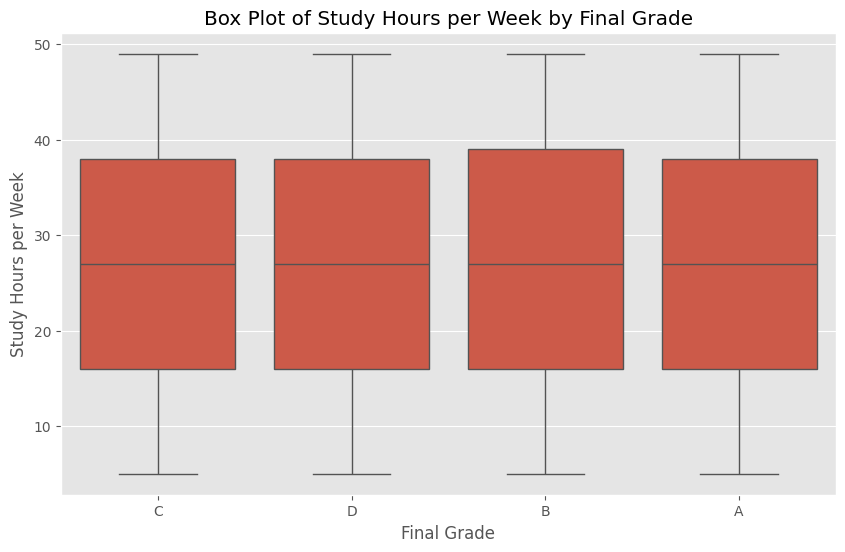

In [36]:
df_pandas = df.select("Final_Grade", "Study_Hours_per_Week").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Study_Hours_per_Week", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Study Hours per Week")
plt.title("Box Plot of Study Hours per Week by Final Grade")
plt.show()

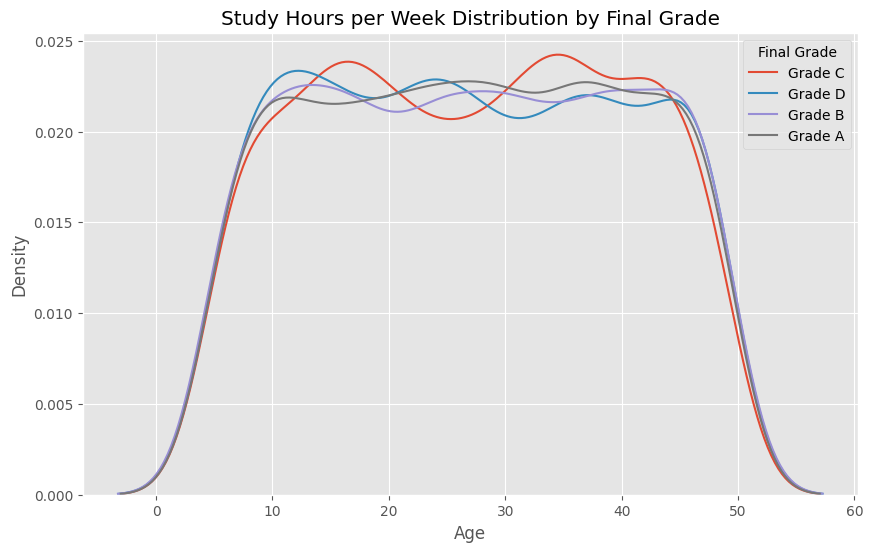

In [ ]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Study_Hours_per_Week"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Study Hours per Week Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

Final Grade vs Preferred Learning Style

In [38]:
df_count_1 = df.groupby("Final_Grade", "Preferred_Learning_Style").count().withColumnRenamed("count", "Count").orderBy("Final_Grade", "Preferred_Learning_Style")
df_count_2 = df.groupby("Final_Grade").count().withColumnRenamed("count", "Count_Grade").orderBy("Final_Grade")

df_count_1.join(df_count_2, on = "Final_Grade", how = "inner") \
                .withColumn("Percentage", round((col("Count") / col("Count_Grade")) * 100, 2)) \
                .orderBy("Final_Grade", "Preferred_Learning_Style") \
                .select("Final_Grade", "Preferred_Learning_Style", "Count", "Percentage").show()

+-----------+------------------------+-----+----------+
|Final_Grade|Preferred_Learning_Style|Count|Percentage|
+-----------+------------------------+-----+----------+
|          A|                Auditory|  684|     25.54|
|          A|             Kinesthetic|  676|     25.24|
|          A|         Reading/Writing|  649|     24.23|
|          A|                  Visual|  669|     24.98|
|          B|                Auditory|  586|     23.87|
|          B|             Kinesthetic|  634|     25.82|
|          B|         Reading/Writing|  609|     24.81|
|          B|                  Visual|  626|      25.5|
|          C|                Auditory|  605|      24.8|
|          C|             Kinesthetic|  588|      24.1|
|          C|         Reading/Writing|  638|     26.15|
|          C|                  Visual|  609|     24.96|
|          D|                Auditory|  591|     24.35|
|          D|             Kinesthetic|  615|     25.34|
|          D|         Reading/Writing|  602|    

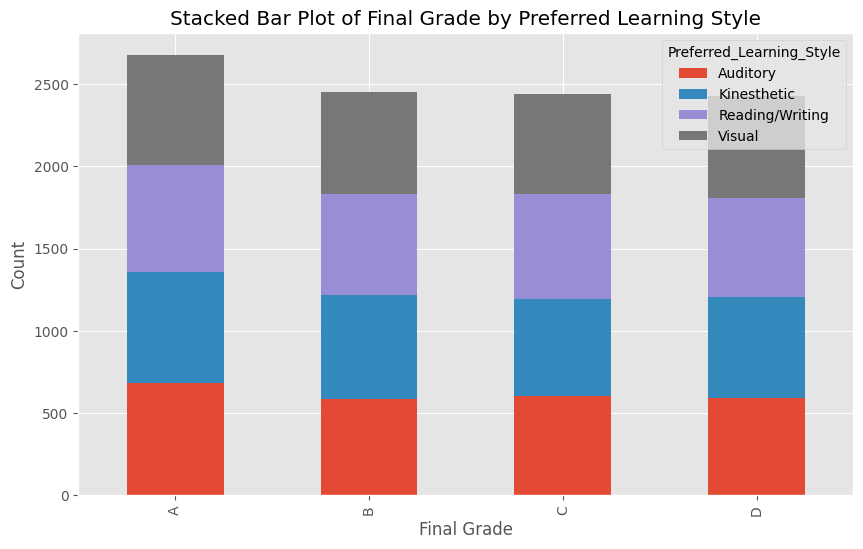

In [39]:
df_pandas = df.select("Final_Grade", "Preferred_Learning_Style").toPandas()
crosstab = pd.crosstab(df_pandas["Final_Grade"], df_pandas["Preferred_Learning_Style"])

crosstab.plot(kind = "bar", stacked = True, figsize = (10, 6))
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Final Grade by Preferred Learning Style")
plt.show()

Final Grade vs Total Online Courses Completed

In [40]:
df.groupby("Final_Grade").agg(sum("Online_Courses_Completed").alias("Total_Online_Courses_Completed")).orderBy("Final_Grade").show()

+-----------+------------------------------+
|Final_Grade|Total_Online_Courses_Completed|
+-----------+------------------------------+
|          A|                         26534|
|          B|                         24630|
|          C|                         24873|
|          D|                         24042|
+-----------+------------------------------+



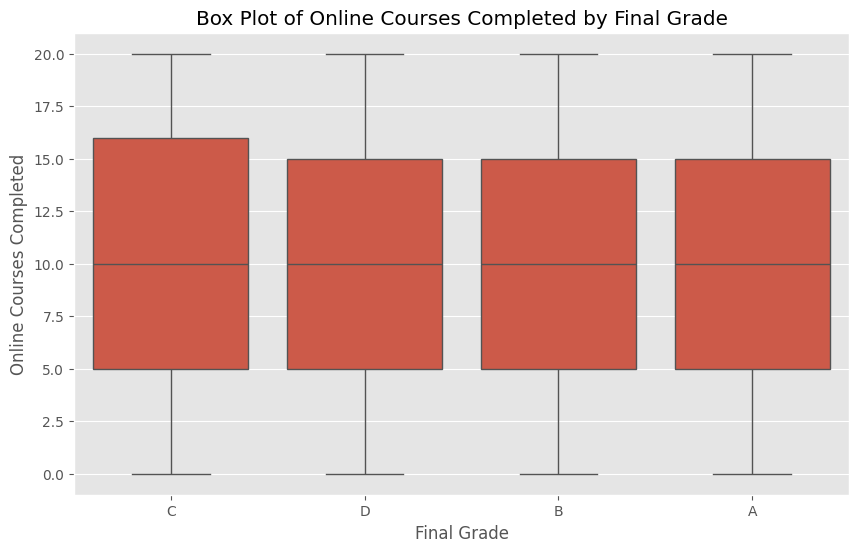

In [41]:
df_pandas = df.select("Final_Grade", "Online_Courses_Completed").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Online_Courses_Completed", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Online Courses Completed")
plt.title("Box Plot of Online Courses Completed by Final Grade")
plt.show()

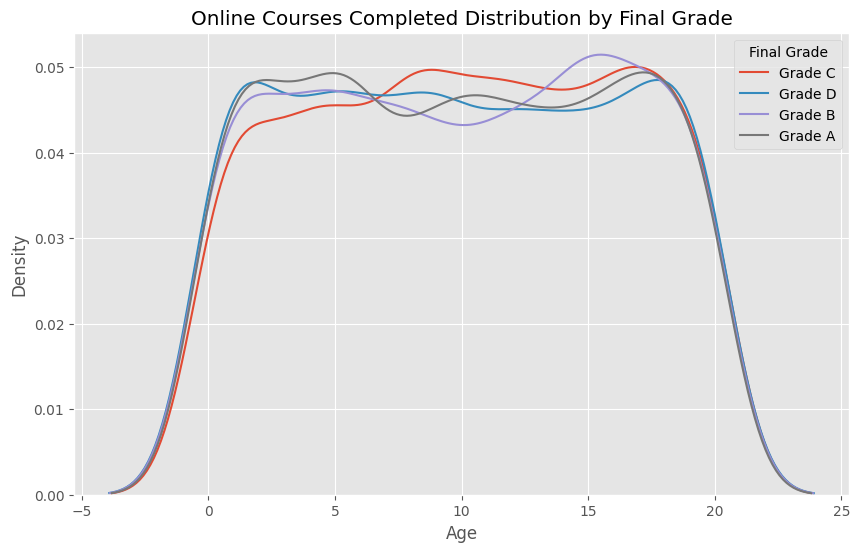

In [42]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Online_Courses_Completed"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Online Courses Completed Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

Final Grade vs Participation in Discussions

In [43]:
df_count_1 = df.groupby("Final_Grade", "Participation_in_Discussions").count().withColumnRenamed("count", "Count").orderBy("Final_Grade", "Participation_in_Discussions")
df_count_2 = df.groupby("Final_Grade").count().withColumnRenamed("count", "Count_Grade").orderBy("Final_Grade")

df_count_1.join(df_count_2, on = "Final_Grade", how = "inner") \
                .withColumn("Percentage", round((col("Count") / col("Count_Grade")) * 100, 2)) \
                .orderBy("Final_Grade", "Participation_in_Discussions") \
                .select("Final_Grade", "Participation_in_Discussions", "Count", "Percentage").show()

+-----------+----------------------------+-----+----------+
|Final_Grade|Participation_in_Discussions|Count|Percentage|
+-----------+----------------------------+-----+----------+
|          A|                          No| 1062|     39.66|
|          A|                         Yes| 1616|     60.34|
|          B|                          No|  997|     40.61|
|          B|                         Yes| 1458|     59.39|
|          C|                          No|  971|      39.8|
|          C|                         Yes| 1469|      60.2|
|          D|                          No|  974|     40.13|
|          D|                         Yes| 1453|     59.87|
+-----------+----------------------------+-----+----------+



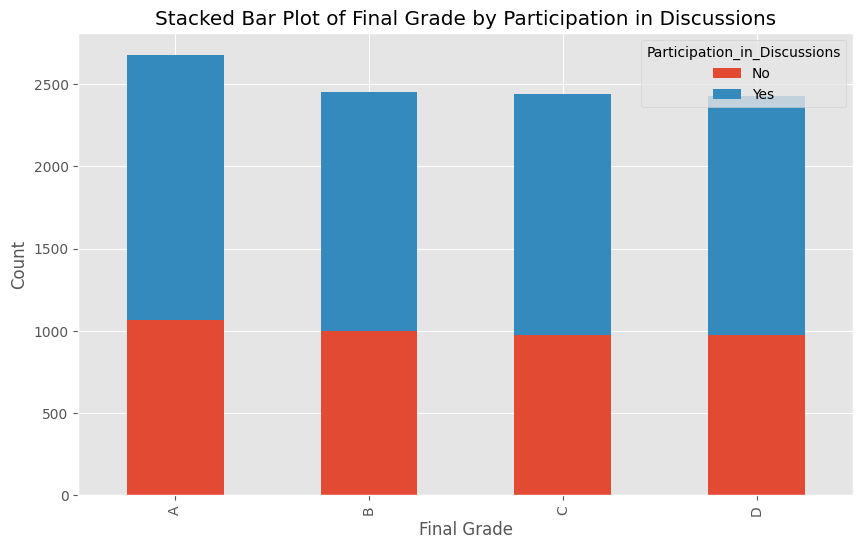

In [44]:
df_pandas = df.select("Final_Grade", "Participation_in_Discussions").toPandas()
crosstab = pd.crosstab(df_pandas["Final_Grade"], df_pandas["Participation_in_Discussions"])

crosstab.plot(kind = "bar", stacked = True, figsize = (10, 6))
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Final Grade by Participation in Discussions")
plt.show()

Final grade vs Assignment Completion Rate

In [45]:
df.groupby("Final_Grade").agg(round(avg("Assignment_Completion_Rate"), 2).alias("Average_Assignment_Completion_Rate"), 
                                    min("Assignment_Completion_Rate").alias("Minimum_Assignment_Completion_Rate"), 
                                    max("Assignment_Completion_Rate").alias("Maximum_Assignment_Completion_Rate"),
                                    median("Assignment_Completion_Rate").alias("Median_Assignment_Completion_Rate"),
                                    mode("Assignment_Completion_Rate").alias("Mode_Assignment_Completion_Rate")).orderBy("Final_Grade").show()

+-----------+----------------------------------+----------------------------------+----------------------------------+---------------------------------+-------------------------------+
|Final_Grade|Average_Assignment_Completion_Rate|Minimum_Assignment_Completion_Rate|Maximum_Assignment_Completion_Rate|Median_Assignment_Completion_Rate|Mode_Assignment_Completion_Rate|
+-----------+----------------------------------+----------------------------------+----------------------------------+---------------------------------+-------------------------------+
|          A|                             75.05|                                50|                               100|                             76.0|                             81|
|          B|                             75.02|                                50|                               100|                             75.0|                             82|
|          C|                             75.14|                           

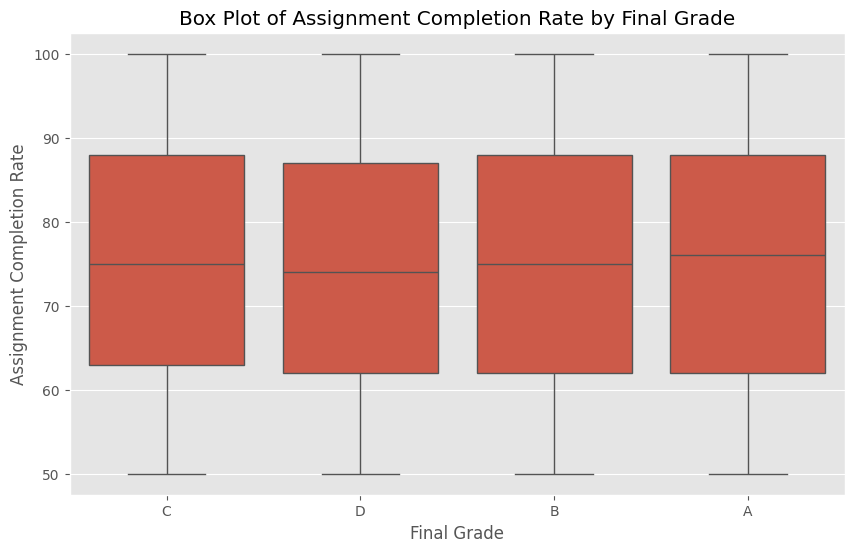

In [46]:
df_pandas = df.select("Final_Grade", "Assignment_Completion_Rate").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Assignment_Completion_Rate", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Assignment Completion Rate")
plt.title("Box Plot of Assignment Completion Rate by Final Grade")
plt.show()

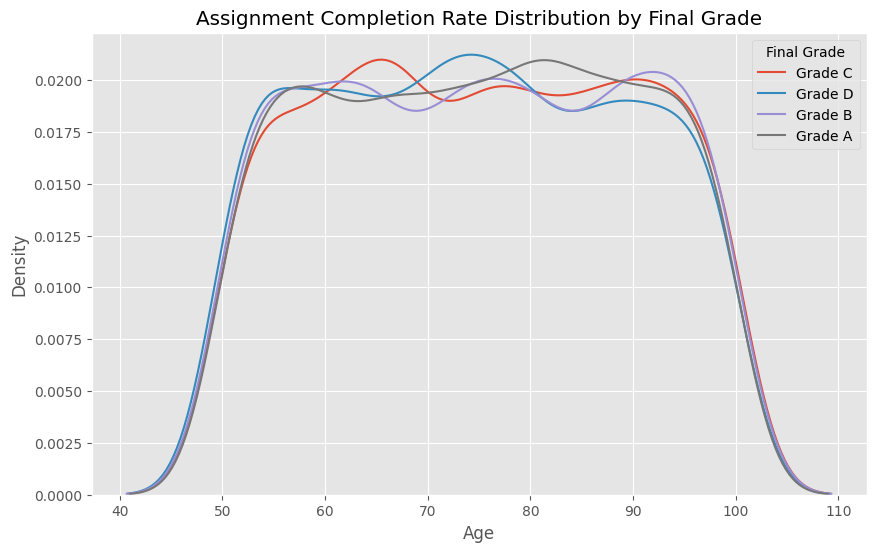

In [47]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Assignment_Completion_Rate"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Assignment Completion Rate Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

Final grade vs Exam Score

In [48]:
df.groupby("Final_Grade").agg(round(avg("Exam_Score"), 2).alias("Average_Exam_Score"), 
                                    min("Exam_Score").alias("Minimum_Exam_Score"), 
                                    max("Exam_Score").alias("Maximum_Exam_Score"),
                                    median("Exam_Score").alias("Median_Exam_Score"),
                                    mode("Exam_Score").alias("Mode_Exam_Score")).orderBy("Final_Grade").show()

+-----------+------------------+------------------+------------------+-----------------+---------------+
|Final_Grade|Average_Exam_Score|Minimum_Exam_Score|Maximum_Exam_Score|Median_Exam_Score|Mode_Exam_Score|
+-----------+------------------+------------------+------------------+-----------------+---------------+
|          A|             92.51|                85|               100|             92.0|             94|
|          B|             76.92|                70|                84|             77.0|             71|
|          C|             62.05|                55|                69|             62.0|             55|
|          D|             46.94|                40|                54|             47.0|             41|
+-----------+------------------+------------------+------------------+-----------------+---------------+



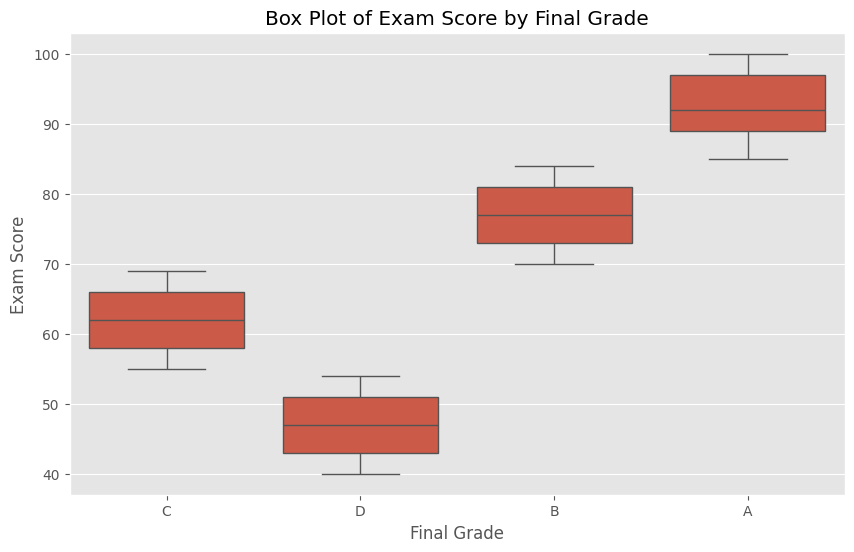

In [51]:
df_pandas = df.select("Final_Grade", "Exam_Score").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Exam_Score", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Exam Score")
plt.title("Box Plot of Exam Score by Final Grade")
plt.show()

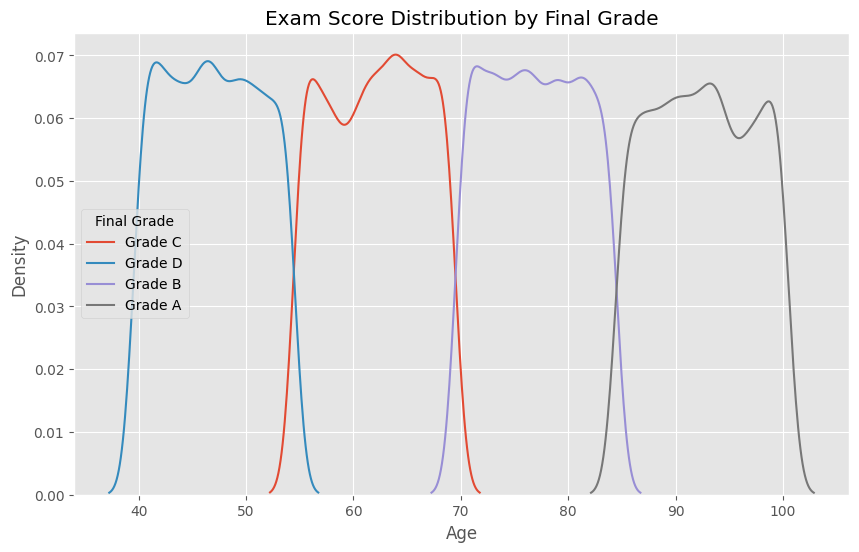

In [52]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Exam_Score"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Exam Score Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

Final grade vs Attendance Rate

In [50]:
df.groupby("Final_Grade").agg(round(avg("Attendance_Rate"), 2).alias("Average_Attendance_Rate"), 
                                    min("Attendance_Rate").alias("Minimum_Attendance_Rate"), 
                                    max("Attendance_Rate").alias("Maximum_Attendance_Rate"),
                                    median("Attendance_Rate").alias("Median_Attendance_Rate"),
                                    mode("Attendance_Rate").alias("Mode_Attendance_Rate")).orderBy("Final_Grade").show()

+-----------+-----------------------+-----------------------+-----------------------+----------------------+--------------------+
|Final_Grade|Average_Attendance_Rate|Minimum_Attendance_Rate|Maximum_Attendance_Rate|Median_Attendance_Rate|Mode_Attendance_Rate|
+-----------+-----------------------+-----------------------+-----------------------+----------------------+--------------------+
|          A|                  75.35|                     50|                    100|                  76.0|                  76|
|          B|                  74.91|                     50|                    100|                  75.0|                  81|
|          C|                  74.97|                     50|                    100|                  75.0|                  64|
|          D|                  75.07|                     50|                    100|                  76.0|                  98|
+-----------+-----------------------+-----------------------+-----------------------+-----

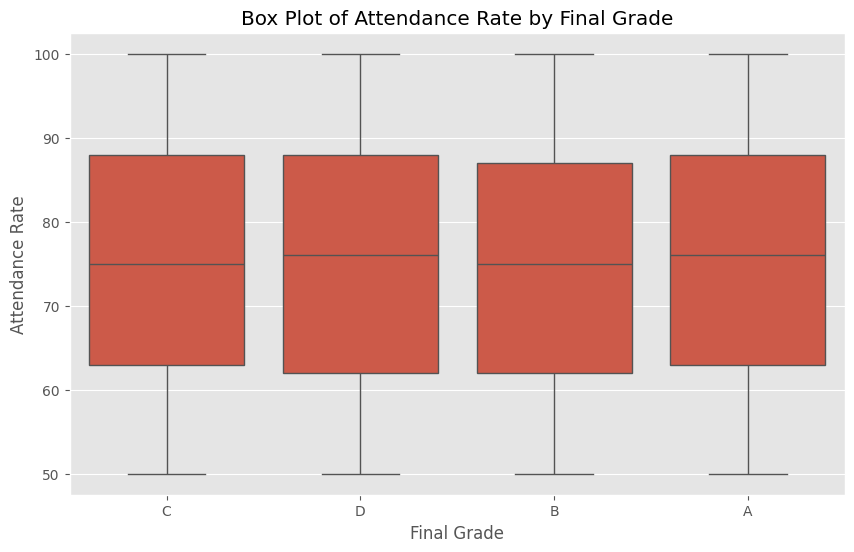

In [53]:
df_pandas = df.select("Final_Grade", "Attendance_Rate").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Attendance_Rate", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Attendance Rate")
plt.title("Box Plot of Attendance Rate by Final Grade")
plt.show()

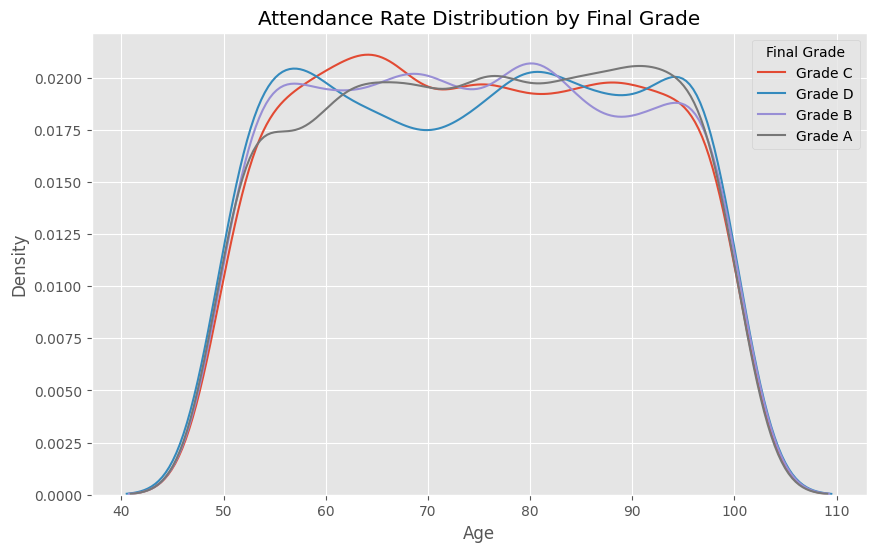

In [54]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Attendance_Rate"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Attendance Rate Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

Final grade vs Use of Educational Tech

In [55]:
df_count_1 = df.groupby("Final_Grade", "Use_of_Educational_Tech").count().withColumnRenamed("count", "Count").orderBy("Final_Grade", "Use_of_Educational_Tech")
df_count_2 = df.groupby("Final_Grade").count().withColumnRenamed("count", "Count_Grade").orderBy("Final_Grade")

df_count_1.join(df_count_2, on = "Final_Grade", how = "inner") \
                .withColumn("Percentage", round((col("Count") / col("Count_Grade")) * 100, 2)) \
                .orderBy("Final_Grade", "Use_of_Educational_Tech") \
                .select("Final_Grade", "Use_of_Educational_Tech", "Count", "Percentage").show()

+-----------+-----------------------+-----+----------+
|Final_Grade|Use_of_Educational_Tech|Count|Percentage|
+-----------+-----------------------+-----+----------+
|          A|                     No|  816|     30.47|
|          A|                    Yes| 1862|     69.53|
|          B|                     No|  735|     29.94|
|          B|                    Yes| 1720|     70.06|
|          C|                     No|  705|     28.89|
|          C|                    Yes| 1735|     71.11|
|          D|                     No|  722|     29.75|
|          D|                    Yes| 1705|     70.25|
+-----------+-----------------------+-----+----------+



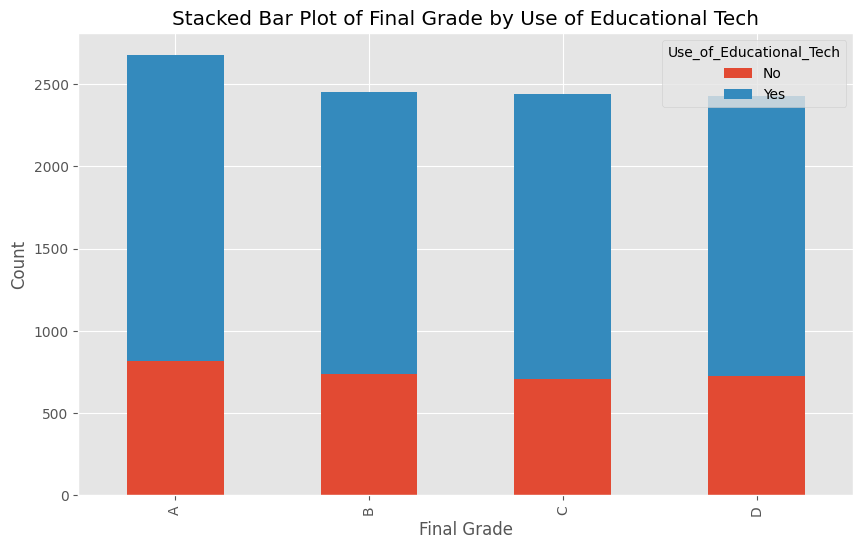

In [56]:
df_pandas = df.select("Final_Grade", "Use_of_Educational_Tech").toPandas()
crosstab = pd.crosstab(df_pandas["Final_Grade"], df_pandas["Use_of_Educational_Tech"])

crosstab.plot(kind = "bar", stacked = True, figsize = (10, 6))
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Final Grade by Use of Educational Tech")
plt.show()

Final grade vs Self Reported Stress Level

In [57]:
df_count_1 = df.groupby("Final_Grade", "Self_Reported_Stress_Level").count().withColumnRenamed("count", "Count").orderBy("Final_Grade", "Self_Reported_Stress_Level")
df_count_2 = df.groupby("Final_Grade").count().withColumnRenamed("count", "Count_Grade").orderBy("Final_Grade")

df_count_1.join(df_count_2, on = "Final_Grade", how = "inner") \
                .withColumn("Percentage", round((col("Count") / col("Count_Grade")) * 100, 2)) \
                .orderBy("Final_Grade", "Self_Reported_Stress_Level") \
                .select("Final_Grade", "Self_Reported_Stress_Level", "Count", "Percentage").show()

+-----------+--------------------------+-----+----------+
|Final_Grade|Self_Reported_Stress_Level|Count|Percentage|
+-----------+--------------------------+-----+----------+
|          A|                      High|  578|     21.58|
|          A|                       Low|  776|     28.98|
|          A|                    Medium| 1324|     49.44|
|          B|                      High|  506|     20.61|
|          B|                       Low|  732|     29.82|
|          B|                    Medium| 1217|     49.57|
|          C|                      High|  490|     20.08|
|          C|                       Low|  732|      30.0|
|          C|                    Medium| 1218|     49.92|
|          D|                      High|  445|     18.34|
|          D|                       Low|  726|     29.91|
|          D|                    Medium| 1256|     51.75|
+-----------+--------------------------+-----+----------+



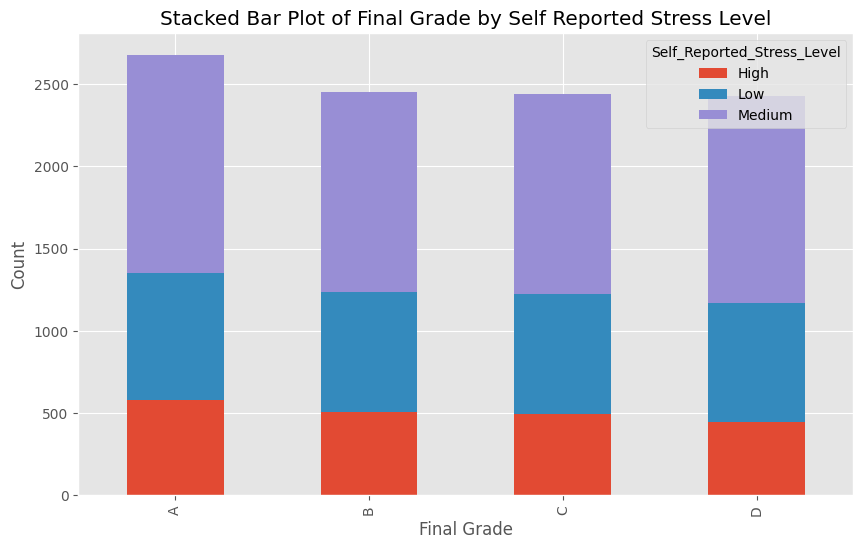

In [58]:
df_pandas = df.select("Final_Grade", "Self_Reported_Stress_Level").toPandas()
crosstab = pd.crosstab(df_pandas["Final_Grade"], df_pandas["Self_Reported_Stress_Level"])

crosstab.plot(kind = "bar", stacked = True, figsize = (10, 6))
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Final Grade by Self Reported Stress Level")
plt.show()

Final grade vs Time Spent on Social Media

In [59]:
df.groupby("Final_Grade").agg(round(avg("Time_Spent_on_Social_Media"), 2).alias("Average_Time_Spent_on_Social_Media"), 
                                    min("Time_Spent_on_Social_Media").alias("Minimum_Time_Spent_on_Social_Media"), 
                                    max("Time_Spent_on_Social_Media").alias("Maximum_Time_Spent_on_Social_Media"),
                                    median("Time_Spent_on_Social_Media").alias("Median_Time_Spent_on_Social_Media"),
                                    mode("Time_Spent_on_Social_Media").alias("Mode_Time_Spent_on_Social_Media")).orderBy("Final_Grade").show()

+-----------+----------------------------------+----------------------------------+----------------------------------+---------------------------------+-------------------------------+
|Final_Grade|Average_Time_Spent_on_Social_Media|Minimum_Time_Spent_on_Social_Media|Maximum_Time_Spent_on_Social_Media|Median_Time_Spent_on_Social_Media|Mode_Time_Spent_on_Social_Media|
+-----------+----------------------------------+----------------------------------+----------------------------------+---------------------------------+-------------------------------+
|          A|                             14.84|                                 0|                                30|                             15.0|                              8|
|          B|                             15.17|                                 0|                                30|                             15.0|                             26|
|          C|                             14.86|                           

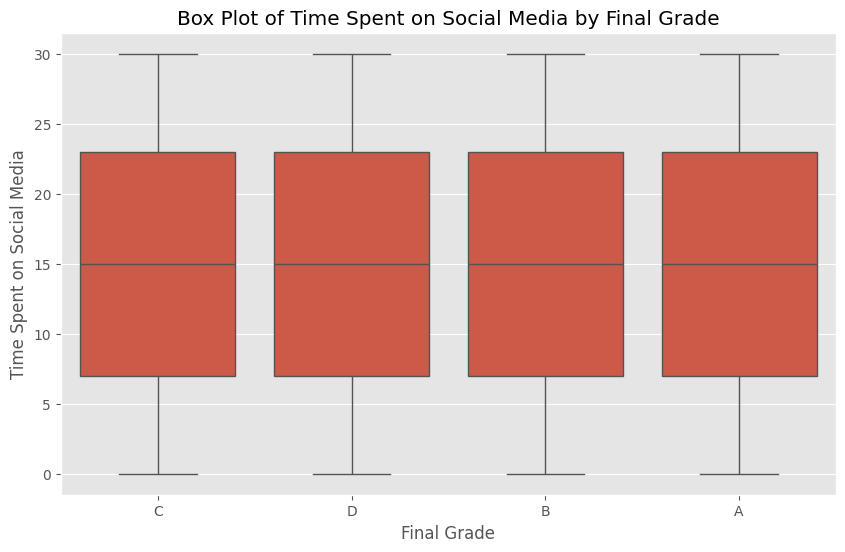

In [62]:
df_pandas = df.select("Final_Grade", "Time_Spent_on_Social_Media").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Time_Spent_on_Social_Media", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Time Spent on Social Media")
plt.title("Box Plot of Time Spent on Social Media by Final Grade")
plt.show()

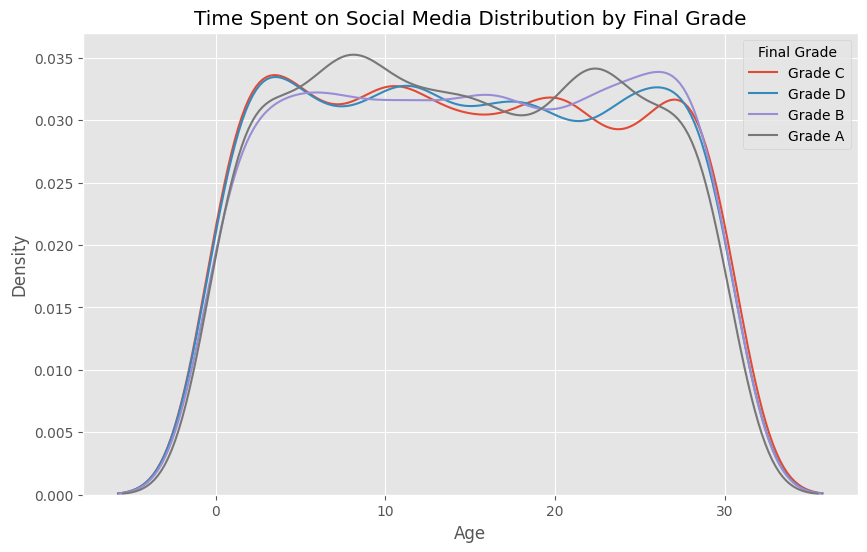

In [63]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Time_Spent_on_Social_Media"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Time Spent on Social Media Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

Final grade vs Sleep Hours per Night

In [61]:
df.groupby("Final_Grade").agg(round(avg("Sleep_Hours_per_Night"), 2).alias("Average_Sleep_Hours_per_Night"), 
                                    min("Sleep_Hours_per_Night").alias("Minimum_Sleep_Hours_per_Night"), 
                                    max("Sleep_Hours_per_Night").alias("Maximum_Sleep_Hours_per_Night"),
                                    median("Sleep_Hours_per_Night").alias("Median_Sleep_Hours_per_Night"),
                                    mode("Sleep_Hours_per_Night").alias("Mode_Sleep_Hours_per_Night")).orderBy("Final_Grade").show()

+-----------+-----------------------------+-----------------------------+-----------------------------+----------------------------+--------------------------+
|Final_Grade|Average_Sleep_Hours_per_Night|Minimum_Sleep_Hours_per_Night|Maximum_Sleep_Hours_per_Night|Median_Sleep_Hours_per_Night|Mode_Sleep_Hours_per_Night|
+-----------+-----------------------------+-----------------------------+-----------------------------+----------------------------+--------------------------+
|          A|                         6.92|                            4|                           10|                         7.0|                         4|
|          B|                         6.96|                            4|                           10|                         7.0|                         7|
|          C|                         7.04|                            4|                           10|                         7.0|                         8|
|          D|                         6.

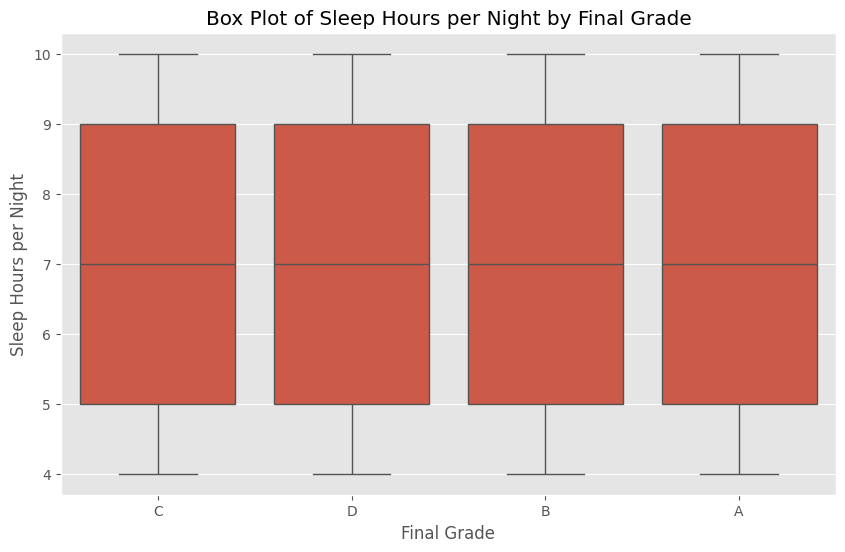

In [64]:
df_pandas = df.select("Final_Grade", "Sleep_Hours_per_Night").toPandas()

plt.figure(figsize = (10, 6))
sns.boxplot(x = "Final_Grade", y = "Sleep_Hours_per_Night", data = df_pandas)
plt.xlabel("Final Grade")
plt.ylabel("Sleep Hours per Night")
plt.title("Box Plot of Sleep Hours per Night by Final Grade")
plt.show()

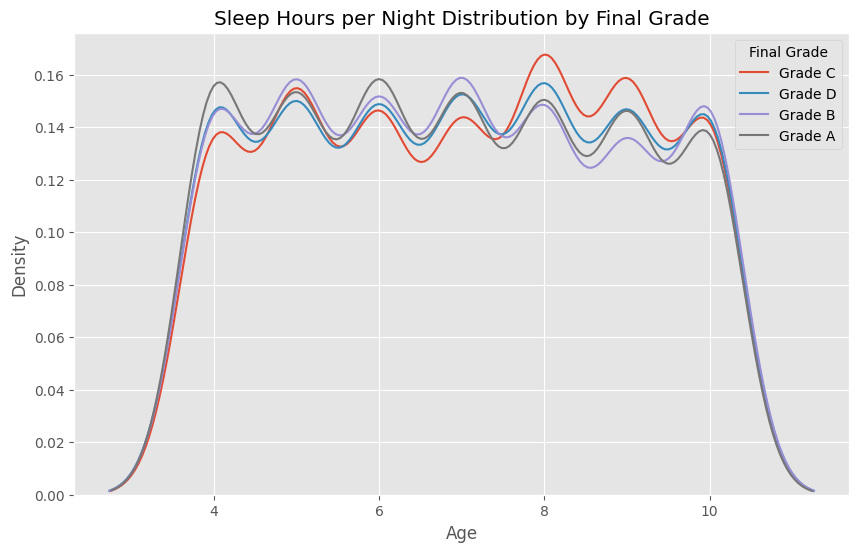

In [65]:
grades = df_pandas["Final_Grade"].unique()

plt.figure(figsize = (10, 6))
for grade in grades:
    subset = df_pandas[df_pandas["Final_Grade"] == grade]
    sns.kdeplot(subset["Sleep_Hours_per_Night"], label = f"Grade {grade}", fill = False)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Sleep Hours per Night Distribution by Final Grade")
plt.legend(title = "Final Grade")

plt.show()

#### 3.2.2. Categorical features

In [18]:
df.select("Student_ID").distinct().count()

10000

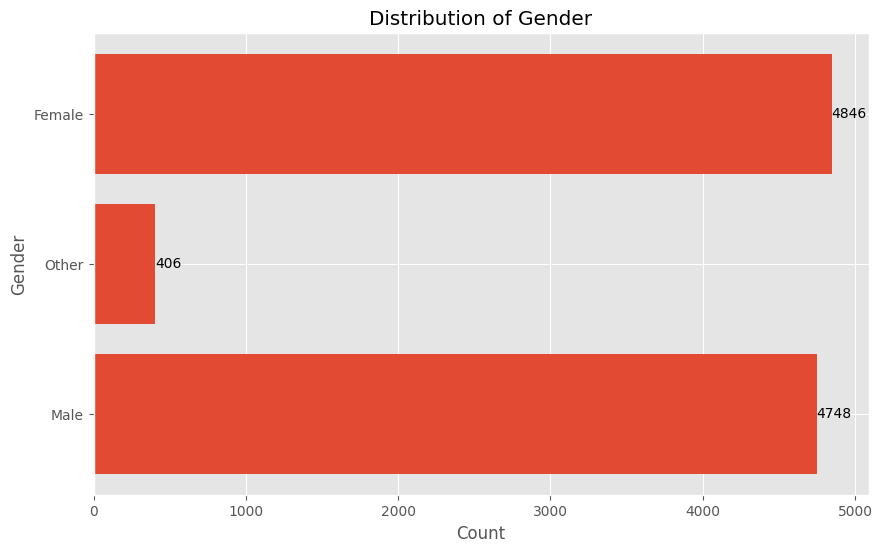

In [19]:
df_group = df.groupby("Gender").count()
df_group_pandas = df_group.toPandas()

plt.figure(figsize = (10, 6))
bars = plt.barh(df_group_pandas["Gender"], df_group_pandas["count"])
for b in bars:
    plt.text(b.get_width(), b.get_y() + b.get_height()/2, f"{b.get_width()}", va = "center")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender")
plt.gca().invert_yaxis()
plt.show()

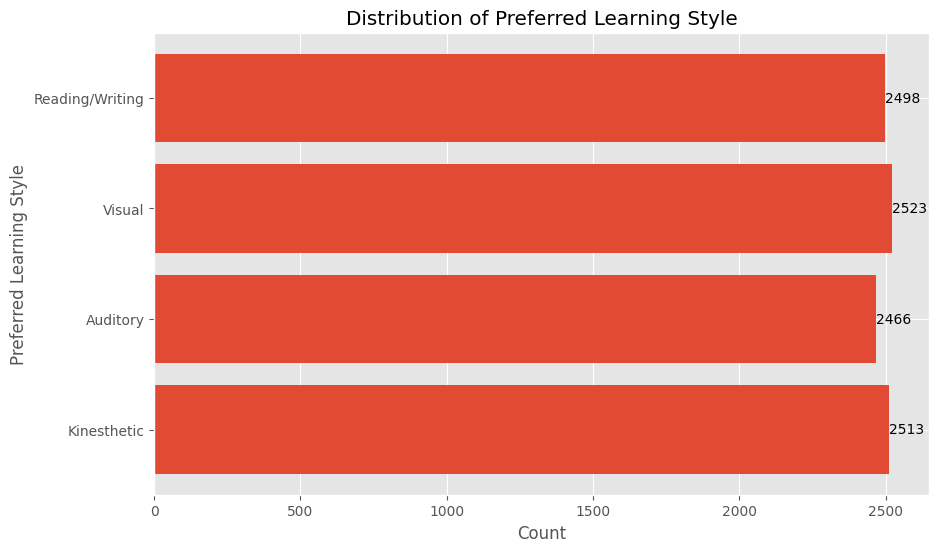

In [20]:
df_group = df.groupby("Preferred_Learning_Style").count()
df_group_pandas = df_group.toPandas()

plt.figure(figsize = (10, 6))
bars = plt.barh(df_group_pandas["Preferred_Learning_Style"], df_group_pandas["count"])
for b in bars:
    plt.text(b.get_width(), b.get_y() + b.get_height()/2, f"{b.get_width()}", va = "center")
plt.xlabel("Count")
plt.ylabel("Preferred Learning Style")
plt.title("Distribution of Preferred Learning Style")
plt.gca().invert_yaxis()
plt.show()

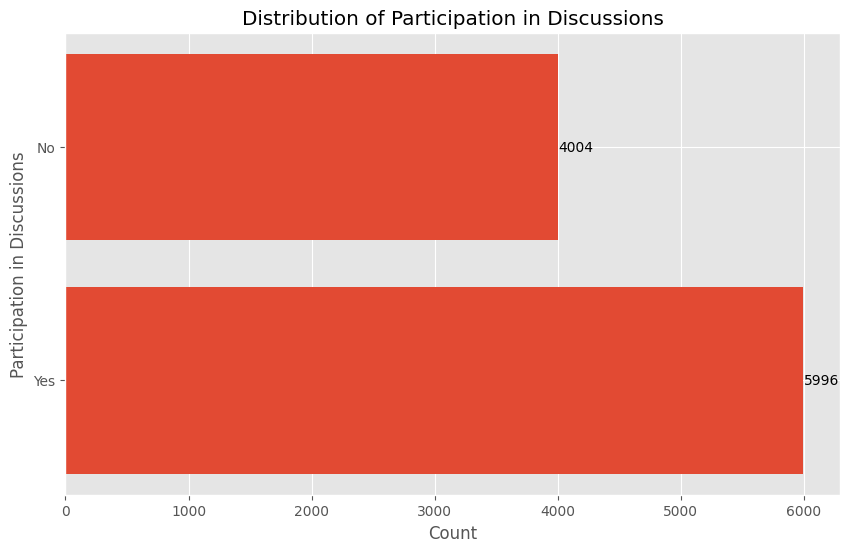

In [21]:
df_group = df.groupby("Participation_in_Discussions").count()
df_group_pandas = df_group.toPandas()

plt.figure(figsize = (10, 6))
bars = plt.barh(df_group_pandas["Participation_in_Discussions"], df_group_pandas["count"])
for b in bars:
    plt.text(b.get_width(), b.get_y() + b.get_height()/2, f"{b.get_width()}", va = "center")
plt.xlabel("Count")
plt.ylabel("Participation in Discussions")
plt.title("Distribution of Participation in Discussions")
plt.gca().invert_yaxis()
plt.show()

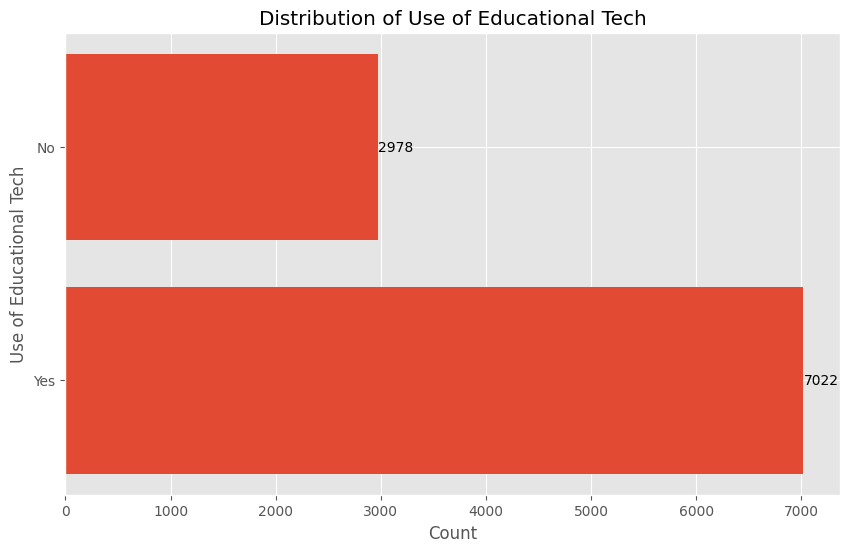

In [22]:
df_group = df.groupby("Use_of_Educational_Tech").count()
df_group_pandas = df_group.toPandas()

plt.figure(figsize = (10, 6))
bars = plt.barh(df_group_pandas["Use_of_Educational_Tech"], df_group_pandas["count"])
for b in bars:
    plt.text(b.get_width(), b.get_y() + b.get_height()/2, f"{b.get_width()}", va = "center")
plt.xlabel("Count")
plt.ylabel("Use of Educational Tech")
plt.title("Distribution of Use of Educational Tech")
plt.gca().invert_yaxis()
plt.show()

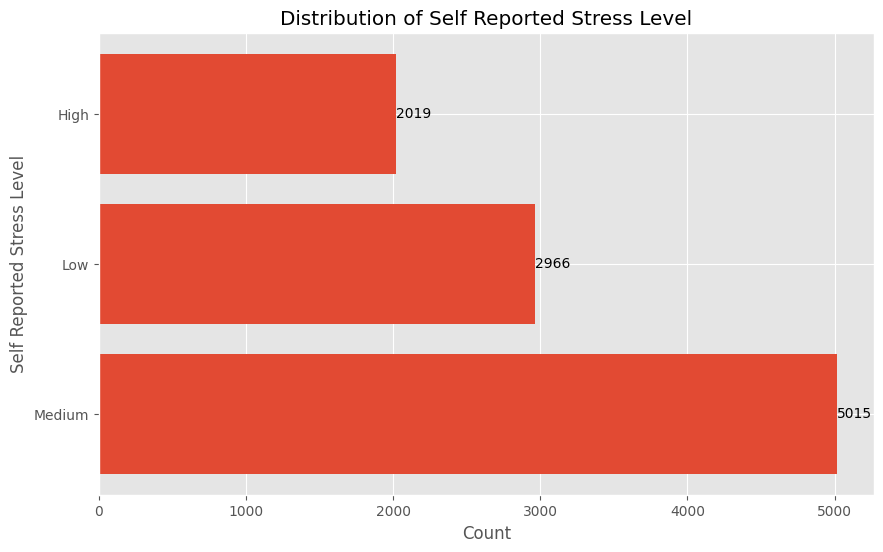

In [23]:
df_group = df.groupby("Self_Reported_Stress_Level").count()
df_group_pandas = df_group.toPandas()

plt.figure(figsize = (10, 6))
bars = plt.barh(df_group_pandas["Self_Reported_Stress_Level"], df_group_pandas["count"])
for b in bars:
    plt.text(b.get_width(), b.get_y() + b.get_height()/2, f"{b.get_width()}", va = "center")
plt.xlabel("Count")
plt.ylabel("Self Reported Stress Level")
plt.title("Distribution of Self Reported Stress Level")
plt.gca().invert_yaxis()
plt.show()

#### 3.2.3. Numeric features

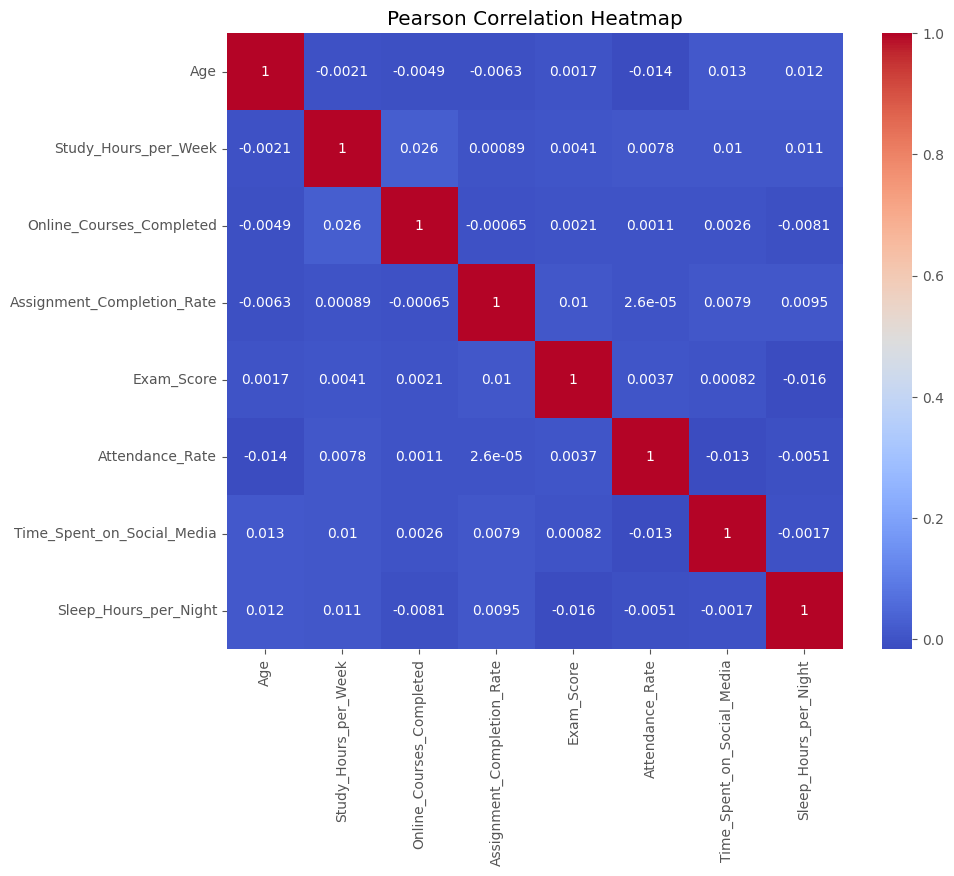

In [24]:
df_pandas = df.select("Age", "Study_Hours_per_Week", "Online_Courses_Completed", "Assignment_Completion_Rate", "Exam_Score", "Attendance_Rate",
                        "Time_Spent_on_Social_Media", "Sleep_Hours_per_Night").toPandas()

correlation_matrix = df_pandas.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

<Axes: title={'center': 'Numeric features distribution'}, ylabel='Density'>

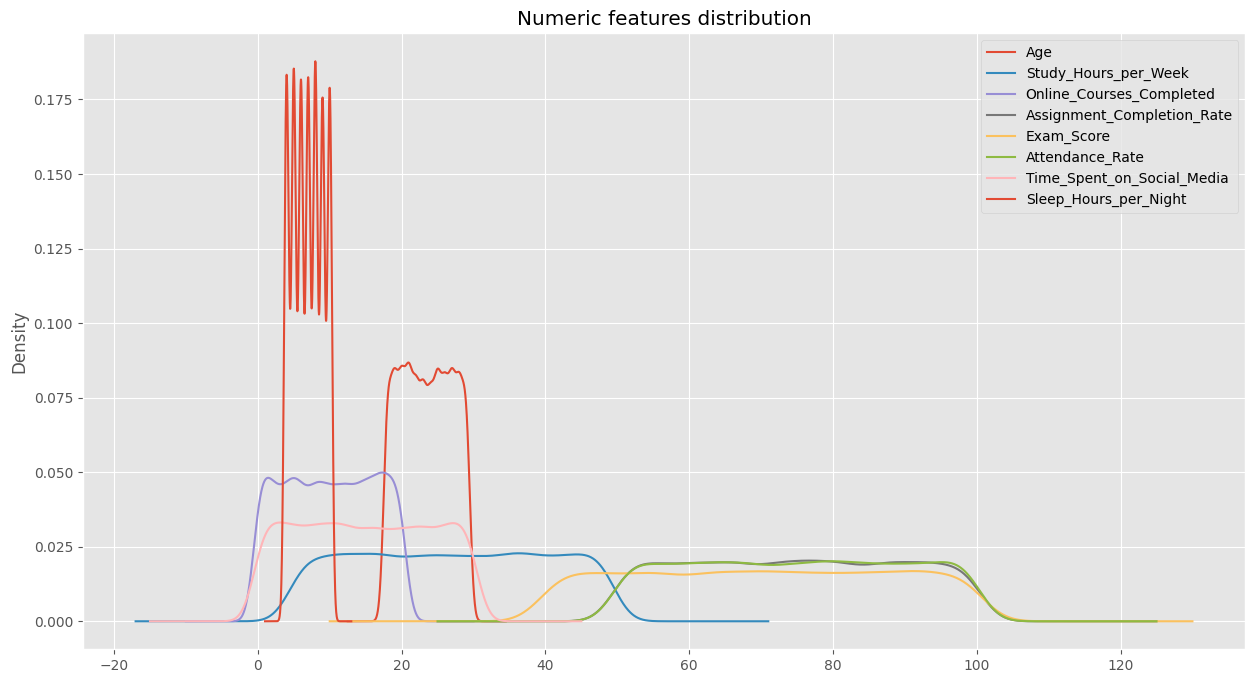

In [25]:
df_pandas.plot(kind = "kde", figsize = (15, 8), title = "Numeric features distribution")

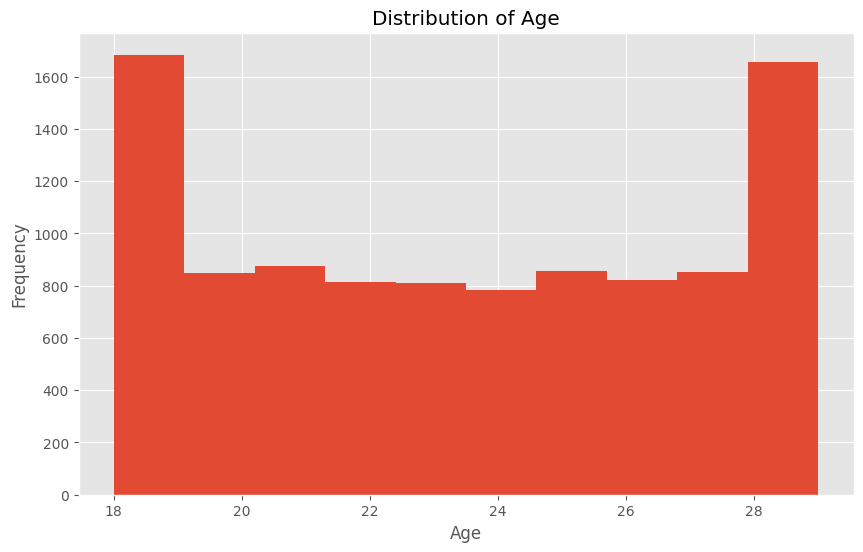

In [26]:
df_pandas = df.select("Age").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

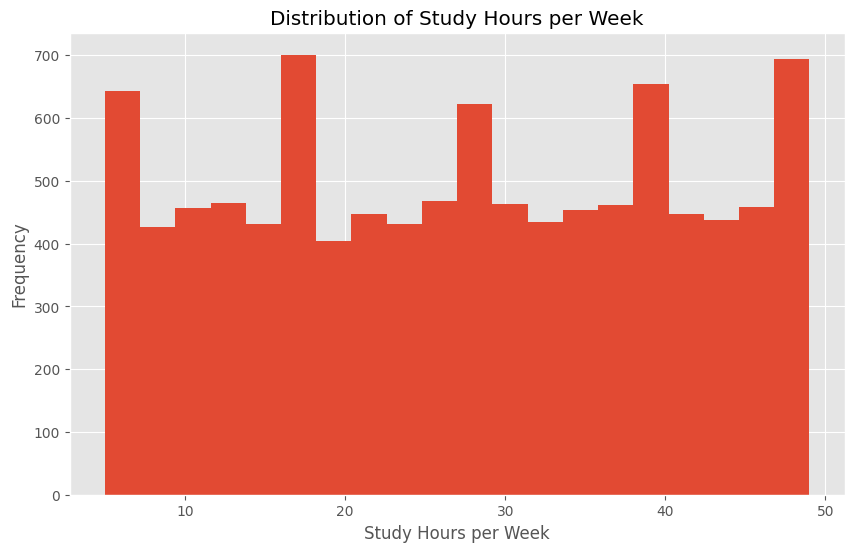

In [27]:
df_pandas = df.select("Study_Hours_per_Week").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values, bins = 20)
plt.xlabel("Study Hours per Week")
plt.ylabel("Frequency")
plt.title("Distribution of Study Hours per Week")
plt.show()

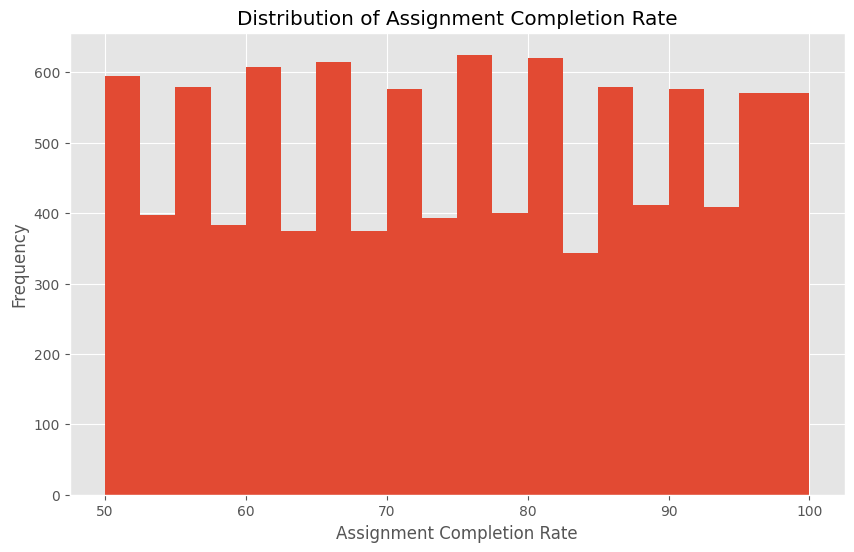

In [28]:
df_pandas = df.select("Assignment_Completion_Rate").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values, bins = 20)
plt.xlabel("Assignment Completion Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Assignment Completion Rate")
plt.show()

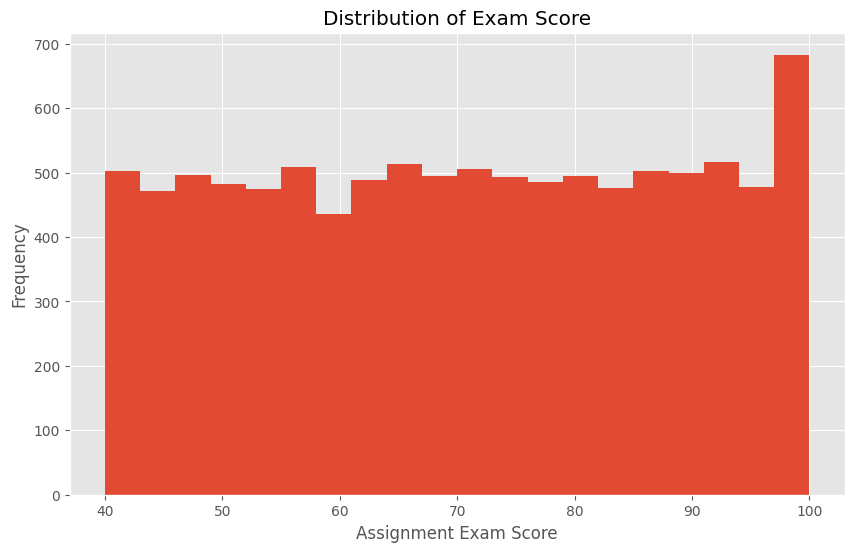

In [29]:
df_pandas = df.select("Exam_Score").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values, bins = 20)
plt.xlabel("Assignment Exam Score")
plt.ylabel("Frequency")
plt.title("Distribution of Exam Score")
plt.show()

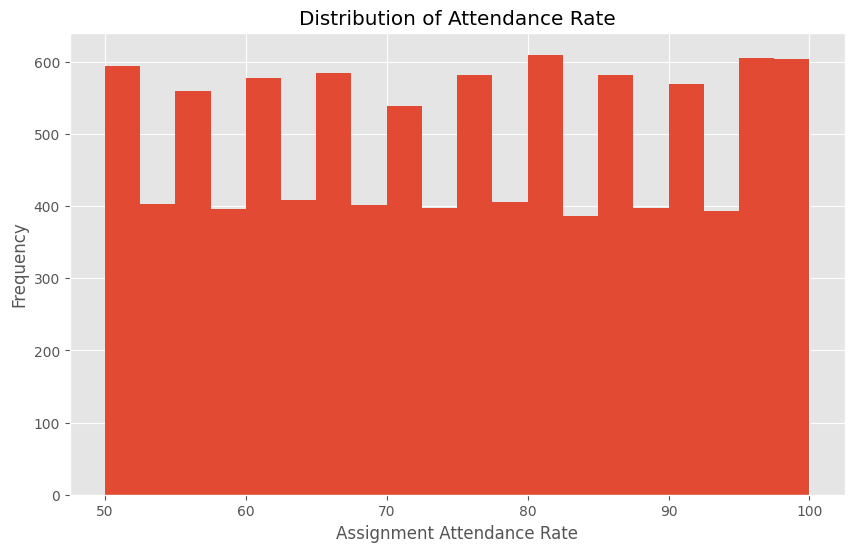

In [30]:
df_pandas = df.select("Attendance_Rate").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values, bins = 20)
plt.xlabel("Assignment Attendance Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Attendance Rate")
plt.show()

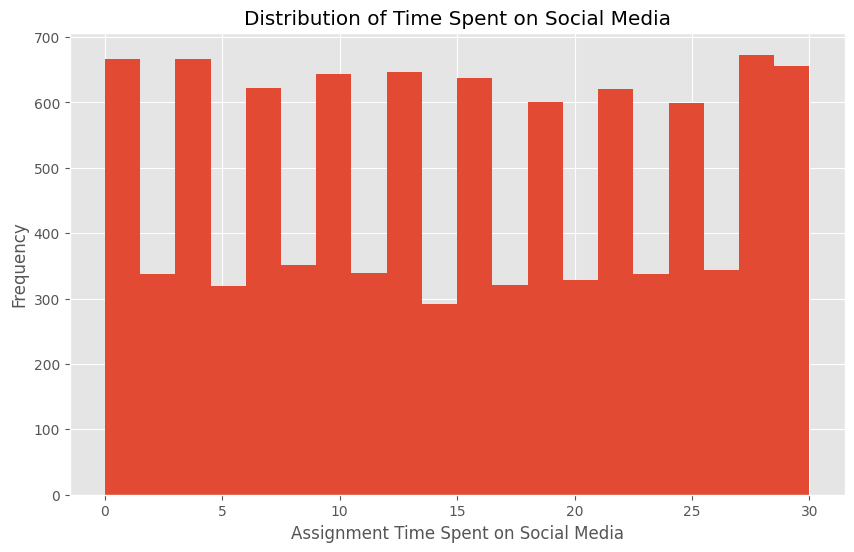

In [31]:
df_pandas = df.select("Time_Spent_on_Social_Media").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values, bins = 20)
plt.xlabel("Assignment Time Spent on Social Media")
plt.ylabel("Frequency")
plt.title("Distribution of Time Spent on Social Media")
plt.show()

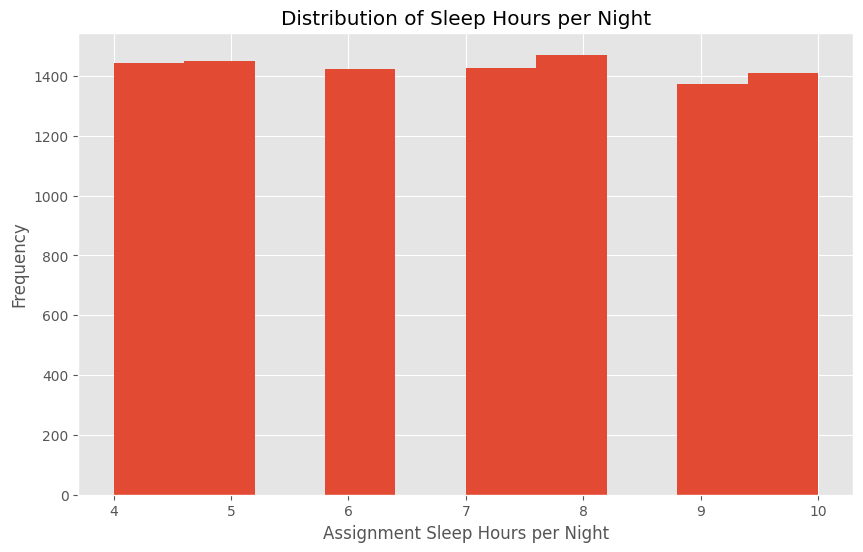

In [32]:
df_pandas = df.select("Sleep_Hours_per_Night").toPandas()

plt.figure(figsize = (10, 6))
plt.hist(df_pandas.values)
plt.xlabel("Assignment Sleep Hours per Night")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Hours per Night")
plt.show()

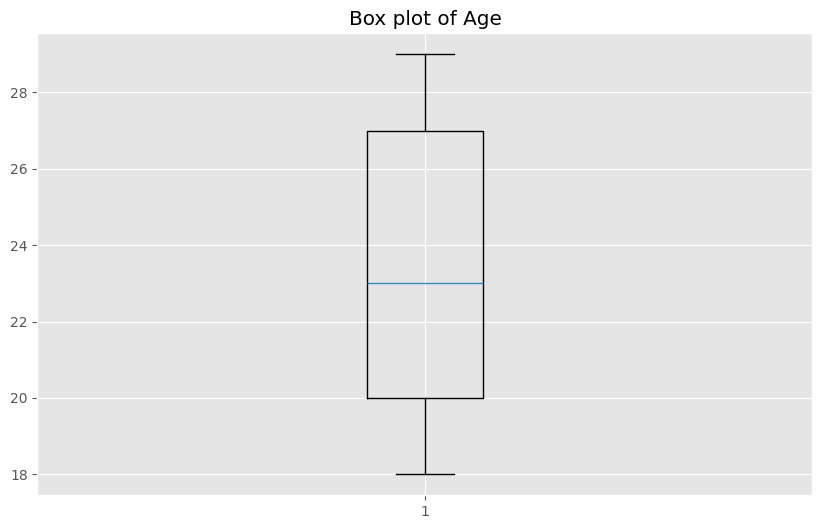

In [33]:
df_pandas = df.select("Age").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Age")
plt.show()

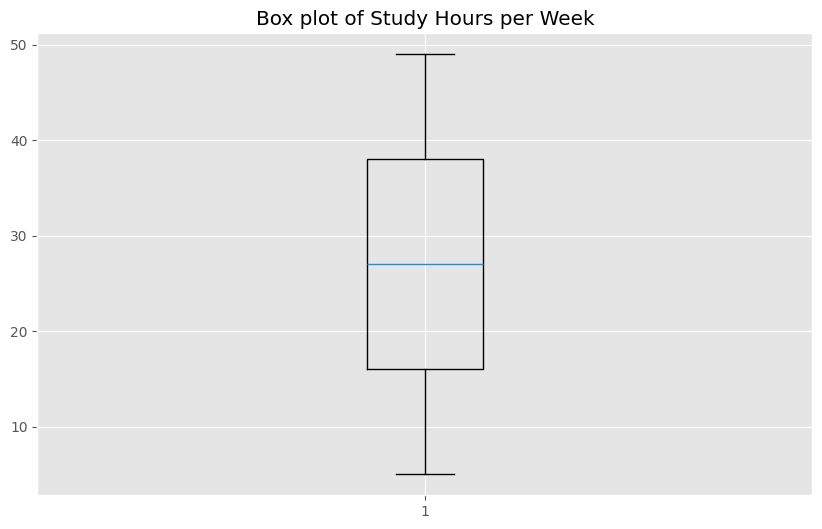

In [34]:
df_pandas = df.select("Study_Hours_per_Week").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Study Hours per Week")
plt.show()

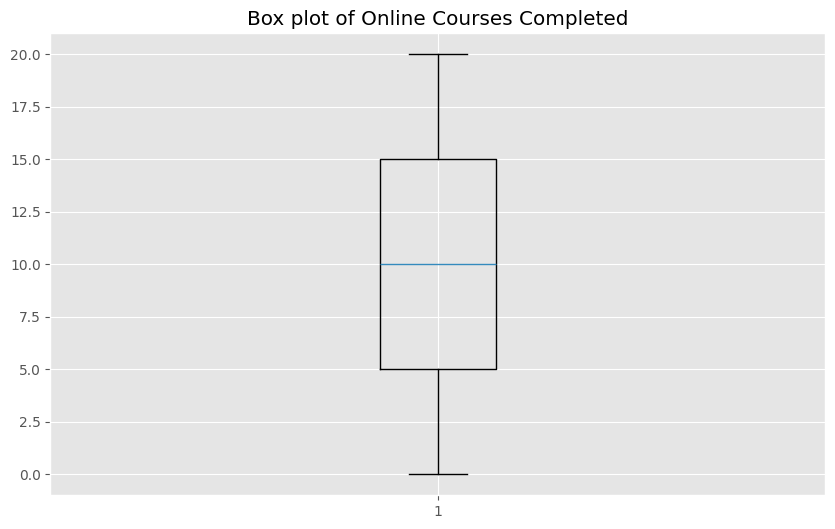

In [35]:
df_pandas = df.select("Online_Courses_Completed").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Online Courses Completed")
plt.show()

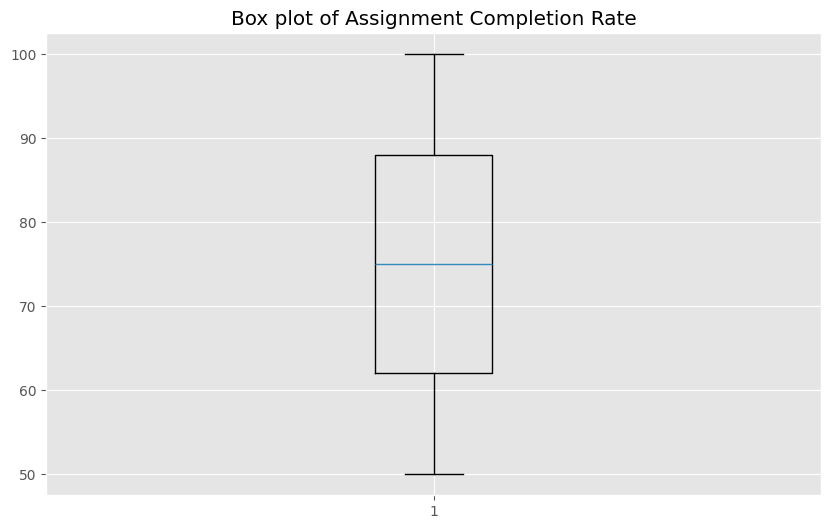

In [36]:
df_pandas = df.select("Assignment_Completion_Rate").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Assignment Completion Rate")
plt.show()

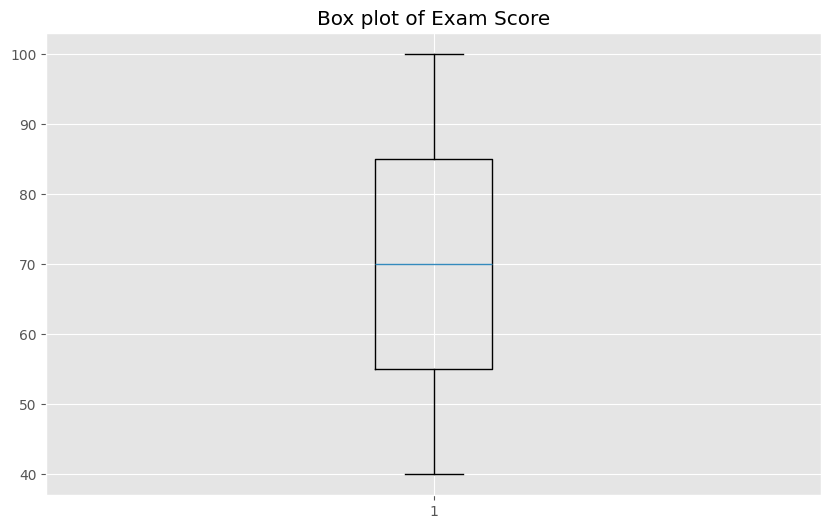

In [37]:
df_pandas = df.select("Exam_Score").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Exam Score")
plt.show()

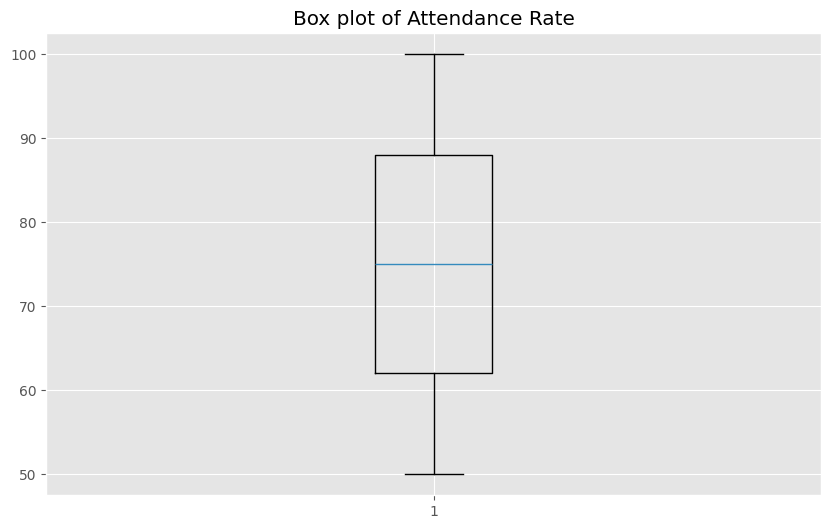

In [38]:
df_pandas = df.select("Attendance_Rate").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Attendance Rate")
plt.show()

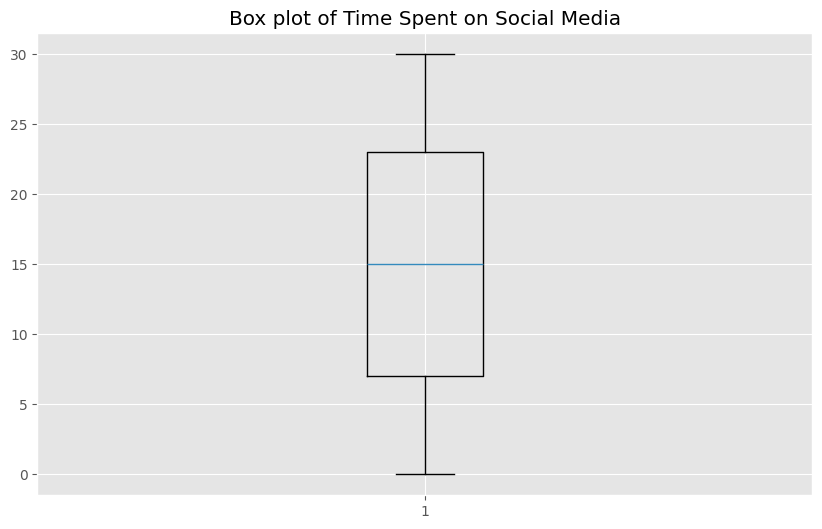

In [39]:
df_pandas = df.select("Time_Spent_on_Social_Media").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Time Spent on Social Media")
plt.show()

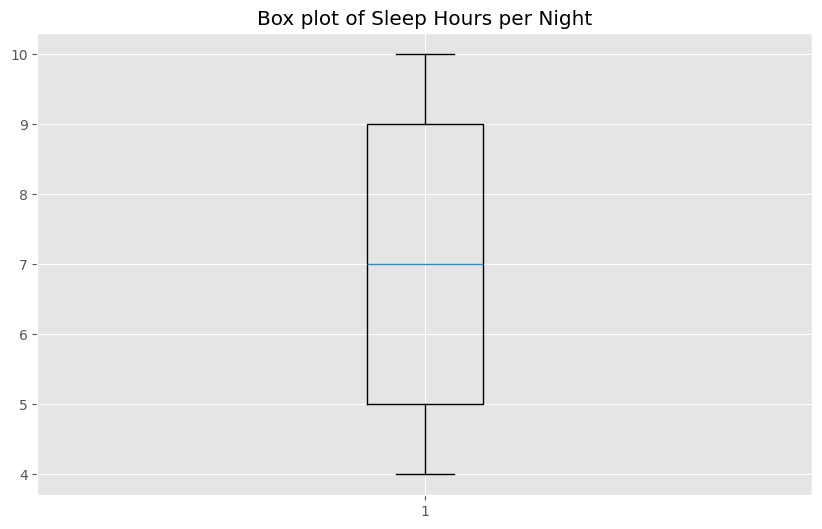

In [40]:
df_pandas = df.select("Sleep_Hours_per_Night").toPandas()

plt.figure(figsize = (10, 6))
plt.boxplot(df_pandas.values)
plt.title("Box plot of Sleep Hours per Night")
plt.show()